# Отчет по практическому заданию №1 
## Постановка задачи
Вычислить интеграл $\displaystyle{\int\limits_{-1}^1dx\int\limits_{-1}^1dy\int\limits_{-1}^1dz  ~ \frac{1}{2+x^2+y^2+z^2}}$ с точность 3\% методом Монте-Карло.

# Тройной интеграл, решение с помощью библиотеки scipy

In [1]:
import scipy.integrate

def f(x, y, z): return 1/(2+x**2+y**2+z**2)  # Задаю функцию 

I=scipy.integrate.tplquad(f, -1, 1, lambda x: -1, lambda x: 1, lambda x, y: -1, lambda x, y: 1)  # Интегрирует

print(I)


(2.7464757046266577, 1.776353308652888e-11)


### Получили значение интеграла равное $2.76475704627 \pm 1.7 \cdot 10^{-11}$
# Решение тройного интеграла методом Монте-Карло
Задаю случайные числа

In [2]:
import numpy as np
N=100000

xu=np.random.sample((N))    # Создаю случайные числа от 0 до 1
xr=2*np.random.sample((3,N)) -1  # Создаю случайные числа от -1 до 1 для трёх осей: x,y,z

x=np.vstack((xu,xr))       # Объединяю 2 массива

print(x)

[[ 0.05072681  0.1821067   0.40477957 ...  0.07760908  0.59712562
   0.43461303]
 [ 0.75593891  0.42929681  0.75462284 ...  0.5832788   0.94242863
   0.61378593]
 [ 0.08484965 -0.47150152  0.99872102 ...  0.17777797  0.22496545
   0.28154638]
 [ 0.77180008 -0.01647726 -0.16627    ... -0.91981877 -0.12580149
   0.25677904]]


### Сравниваю случайные точки с заданным распределением

In [3]:
p=0 # Кол-во подходящих значений
q=0 

for i in range(N):
    f=1/((x[1,i])**2+(x[2,i])**2+(x[3,i])**2+2)
#  f=1/((y0[i])**2+(y1[i])**2+(y2[i])**2+2)
    if x[0,i]<f:
        p+=1
    else:
        q+=1
print(p/(p+q))

0.34597


In [4]:
print(p/(p+q)*8)

2.76776


Умножение на 8 нужно, так как для четырех-мерного измерения получился рассматриваемый объем случайных чисел $V^4 = 2 \cdot 2\cdot 2\cdot 1$ для x, y, z и f(x,y,z) соответственно

# Оценка дисперсии

In [5]:
s=0
s2=0
D=0

for i in range(N):
    s+=(x[0,i])
    s2+=(x[0,i])**2
    
D+=1/(N-1)*(1/N*s2-(1/N*s)**2)

print(s,s2,D)

49869.16785737034 33231.6386169109 8.362383212877242e-07


In [6]:
print(3*np.sqrt(D)*100, '%')

0.2743382017071177 %


###  Таким образом для N=900 ошибка с вероятностью 0.997 не превосходит 0,3%

## Наглядное представление кол-ва использованных случайных точек

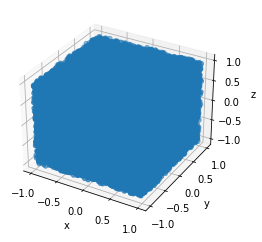

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(x[1,:],x[2,:],x[3,:])

plt.show()